In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import openpyxl

In [152]:
df = pd.read_excel("train_set_2 (1).xlsx")
df = df.iloc[:-1]
df

,Номер,Соперник,Где играем,Лидеры,Дождь,Победа
0,G1,Выше,Дома,На месте,Да,Нет
1,G2,Выше,Дома,На месте,Нет,Да
2,G3,Выше,Дома,Пропускают,Нет,Да
3,G4,Ниже,Дома,Пропускают,Нет,Да
4,G5,Ниже,В гостях,Пропускают,Нет,Нет
5,G6,Ниже,Дома,Пропускают,Да,Да
6,G7,Выше,В гостях,На месте,Да,Нет


In [153]:
df['Соперник'] = df['Соперник'].replace({'Выше': 1, 'Ниже': 0}).astype(int)
df['Где играем'] = df['Где играем'].replace({'Дома': 1, 'В гостях': 0}).astype(int)
df['Лидеры'] = df['Лидеры'].replace({'На месте': 1, 'Пропускают': 0}).astype(int)
df['Дождь'] = df['Дождь'].replace({'Да': 1, 'Нет': 0}).astype(int)
df['Победа'] = df['Победа'].replace({'Да': 1, 'Нет': 0}).astype(int)

df


C:\Users\vechk\AppData\Local\Temp\ipykernel_11936\3283743251.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Соперник'] = df['Соперник'].replace({'Выше': 1, 'Ниже': 0}).astype(int)
C:\Users\vechk\AppData\Local\Temp\ipykernel_11936\3283743251.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Где играем'] = df['Где играем'].replace({'Дома': 1, 'В гостях': 0}).astype(int)
C:\Users\vechk\AppData\Local\Temp\ipykernel_11936\3283743251.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

,Номер,Соперник,Где играем,Лидеры,Дождь,Победа
0,G1,1,1,1,1,0
1,G2,1,1,1,0,1
2,G3,1,1,0,0,1
3,G4,0,1,0,0,1
4,G5,0,0,0,0,0
5,G6,0,1,0,1,1
6,G7,1,0,1,1,0


In [154]:
fn=['Соперник', 'Где играем', 'Лидеры', 'Дождь']
cn=['Нет', 'Да']
X = df[fn]
y = df[['Победа']]

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

In [156]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()



X

,Соперник,Где играем,Лидеры,Дождь
0,1,1,1,1
1,1,1,1,0
2,1,1,0,0
3,0,1,0,0
4,0,0,0,0
5,0,1,0,1
6,1,0,1,1


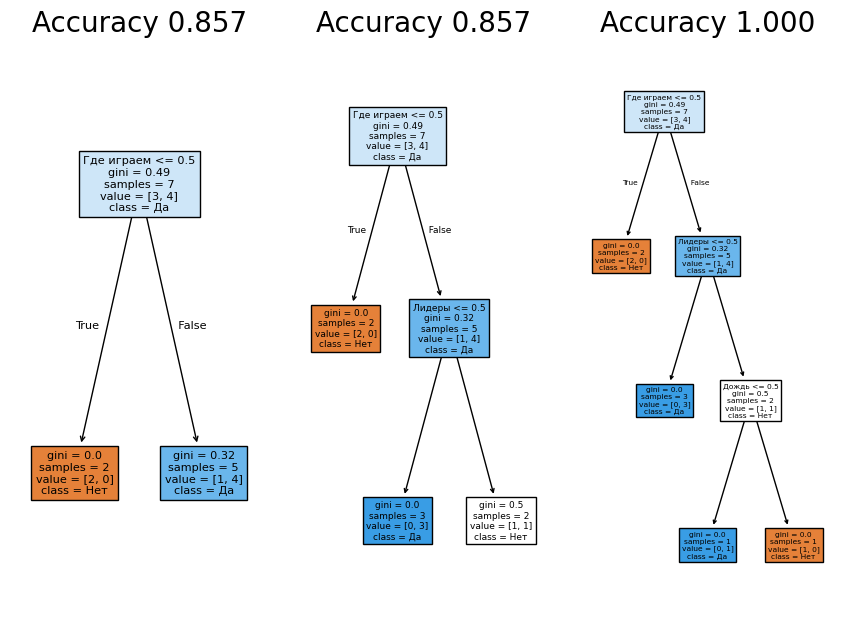

In [157]:

depth = [1, 2, 3]
pic = 1
plt.figure(figsize=(18,18))
#feature_names = X.columns.tolist()
for dep in depth:
    ax = plt.subplot(2, 5, pic)
    clf = DecisionTreeClassifier(max_depth = dep,  criterion = 'gini', random_state = 12345)
    clf.fit(X, y)
    clf_pred = clf.predict(X)
    clf_acc = accuracy_score(y, clf_pred)
    plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
    ax.set_title("Accuracy %.3f" % ( clf_acc), fontsize=20)
    pic+=1

plt.subplots_adjust(wspace=0.1, hspace=0.4)    
    

DecisionTreeClassifier accuracy 1.000000
[[3 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[0]


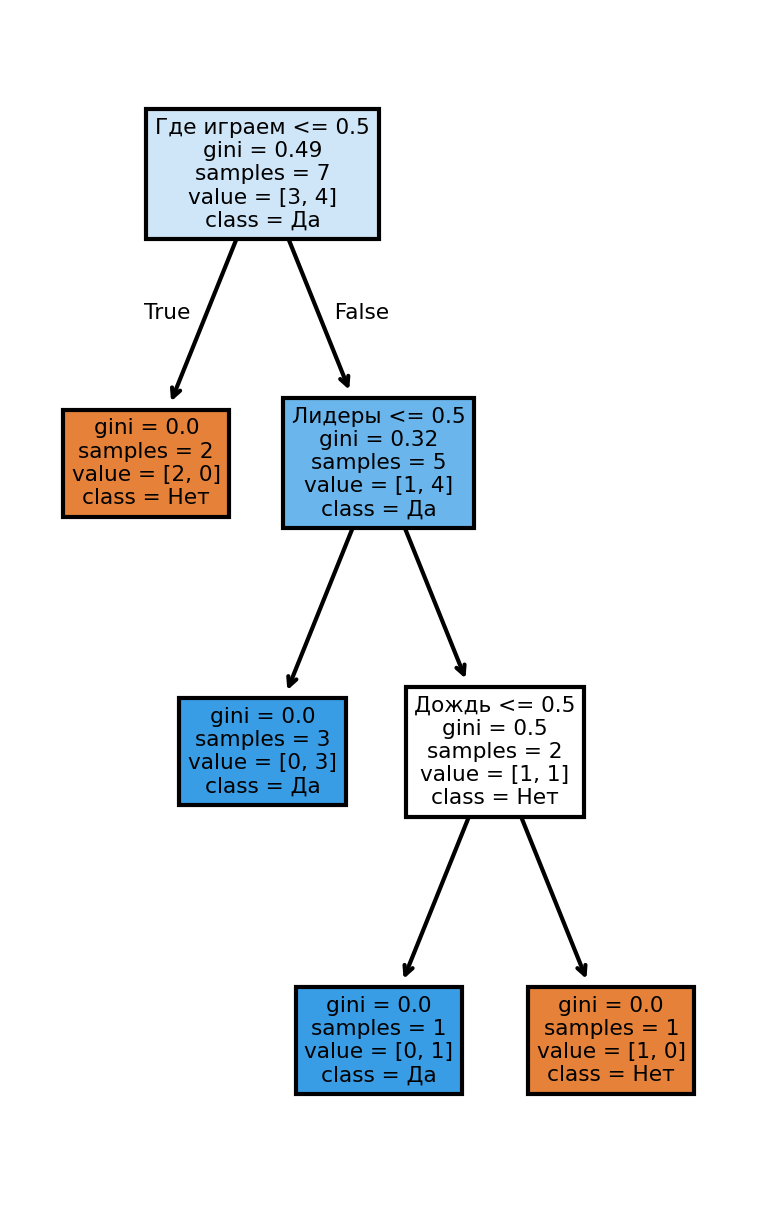

In [158]:
clf = DecisionTreeClassifier(random_state = 12345)
clf.fit(X, y)
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,5), dpi=300)
plot_tree(clf, feature_names = fn, class_names=cn, filled = True);
ax.set_title("Accuracy %.3f" % ( clf_acc), fontsize=20)

X_new =  pd.DataFrame({
    'Соперник': [0],
    'Где играем': [0],
    'Лидеры': [1],
    'Дождь': [0]
})

pred = clf.predict(X_new)
print(pred)

In [159]:
from sklearn.ensemble import RandomForestClassifier
max_trees = 8
height = 2
clf = RandomForestClassifier(n_estimators=max_trees, max_depth = height, random_state = 333)
clf.fit(X, np.ravel(y))
clf_pred = clf.predict(X)
clf_acc = accuracy_score(y, clf_pred)
print("%s accuracy %f" %  ("DecisionTreeClassifier" , clf_acc))
print(confusion_matrix(y, clf_pred))
print(classification_report(y, clf_pred))

DecisionTreeClassifier accuracy 0.857143
[[2 1]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



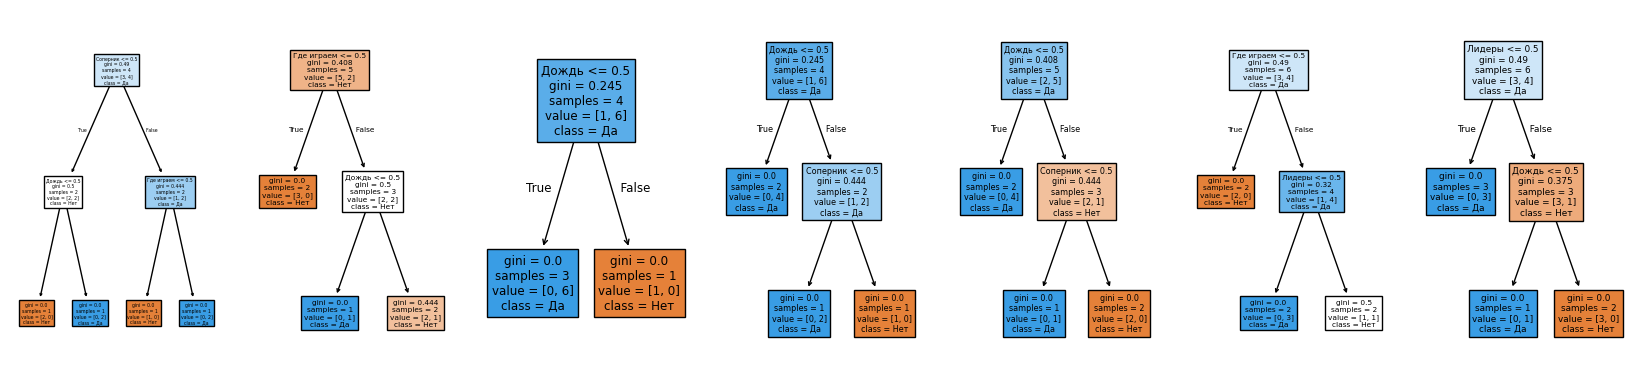

In [160]:
plt.figure(figsize=(30,18))
for pic in range(1,8):
    ax = plt.subplot(3, 10, pic)
    plot_tree(clf.estimators_[pic], feature_names = fn, class_names=cn, filled = True);
plt.subplots_adjust(wspace=0.1, hspace=0.4) 